In [2]:
import sys
# adding notebooks to the system path
sys.path.insert(0, '/home/southark/notebooks')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.4f}'.format
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
%load_ext autoreload
%autoreload 2
%matplotlib inline
import six

from perturbseq import *

from collections import Counter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
import h5py
import pandas as pd

def read_guide_umis_h5(file_path):
    with h5py.File(file_path, 'r') as f:
        guide_umis = f['guide_umis']
        
        # Read the actual indices and values
        index_level0 = [x.decode('utf-8') for x in guide_umis['index_level0'][:]]  # unique cell barcodes
        index_level1 = [x.decode('utf-8') for x in guide_umis['index_level1'][:]]  # unique guide RNAs
        
        idx0 = guide_umis['index_label0'][:]  # indices into level0
        idx1 = guide_umis['index_label1'][:]  # indices into level1
        values = guide_umis['values'][:]
        
        # Create multi-index directly from the label indices
        df = pd.DataFrame(
            values,
            index=pd.MultiIndex.from_arrays(
                [[index_level0[i] for i in idx0],
                 [index_level1[i] for i in idx1]]
            )
        )
        
        return df

# Usage
guide_umi_fibroa = read_guide_umis_h5('/data/norman/southark/tfs_standardized/240118_RPE1_CRISPRa_aggr_total_guide_umis.h5')

flat_df_fibroa = guide_umi_fibroa.reset_index().rename(columns = {'level_0':'cell_barcode', 'level_1': 'guide', 0: 'count'})

# Check result
print(guide_umis.shape)
print(guide_umis.head())

(167510, 1)
                                                           0
AAACCCAAGAAGAACG-1 non-targeting_02833              775.0000
                   non-targeting_03760                1.0000
AAACCCAAGCCTCAAT-1 4932_MED12_P1P2_ENSG00000184634    1.0000
                   4942_MED1_P1P2_ENSG00000125686     1.0000
                   7442_RPL18A_P1P2_ENSG00000105640   1.0000


In [142]:
print(guide_umi_fibroa.loc['TTTGTTGGTCCGATCG-16'])

                                           0
BNC2_GCCCCGAGTCCCAGCCGGCA             1.0000
CIZ1_GCCCAGTGCACAAGTCACGC             1.0000
CREBBP_GCGAGCGTGCTCGGGCCGAA           1.0000
CRTC1_GCAGTGCGCAGGCGCGCCGG            1.0000
GATA1_GGGGCGGGTCCCATGCTTGT         1277.0000
GLI1_GACGTAGAGCCGGGGTTCTA             1.0000
HOXB13_GCCCGGGCACGCGCGCTGAT           1.0000
HSFX2_GCTGCGGTCACATCGCGGTG         1510.0000
IRF6_GCGGCCACGCCTCCCAGGTG             1.0000
ISL1_GGCTCCCGAGGCAACTTGCT             1.0000
KCNIP4_GACAGCCACGCATGAAGTCG           1.0000
LCOR_GCCGCCCCCGGGCCACGCCG           789.0000
RBPJ_GGGCGTCTGGCTCTTCGCGG             1.0000
TAF11_GACCCCTACCGCTCTCCTGA            1.0000
TCF7L1_GCGCCCGCGCGCCGATACGG           1.0000
THRB_GTCGCGCGACGCCCAGTCGC             2.0000
ZBTB10_GGGCGCGGGTAGGTGCGTGT           1.0000
ZBTB39_GGGTCCAGGACCTGCGCGAG           1.0000
ZFY_GGAGTCCAGTGACCTCACTG              1.0000
ZNF215_GTCACCGTGAGTCCATTCAC           1.0000
ZNF358_GGTACGGCCGCGCCCCAGTG           1.0000
ZNF585A_GG

In [159]:
print(guide_umis.tail(60010).head(60))

                                                             0
CACAGGCAGACATAGT-3 5885_NUP107_P1P2_ENSG00000111581  1298.0000
                   5889_NUP160_P1P2_ENSG00000030066     1.0000
                   7522_RPS2_P1P2_ENSG00000140988       1.0000
                   7758_SEH1L_P1P2_ENSG00000085415      1.0000
                   7928_SIRT7_P1P2_ENSG00000187531      1.0000
                   8725_TBCB_P1P2_ENSG00000105254       1.0000
                   9820_WDR43_P1P2_ENSG00000163811      1.0000
                   non-targeting_02833                  1.0000
                   non-targeting_01615                  1.0000
                   non-targeting_00532                  1.0000
CACAGGCAGGCACTAG-3 1893_CSE1L_P1P2_ENSG00000124207      1.0000
                   2544_EIF3A_P1P2_ENSG00000107581      1.0000
                   2791_EXOSC4_P1P2_ENSG00000178896     2.0000
                   2792_EXOSC5_P1P2_ENSG00000077348     1.0000
                   3388_GLE1_P1P2_ENSG00000119392     2

In [150]:
print(guide_umis_rpe1a.loc['TTTGTTGGTCTGCGCA-19'])

                                   0
CCN3_GGGGAAGTGGAACGAACCCC     1.0000
CNBP_GCCCCGCGCCGCGCTCTAGT     1.0000
EGR4_GGGGCCGGGGCCTCCCAAAA     1.0000
ESRRB_GCCCATGGTTCCAGAGTCGG    1.0000
FOXN1_GCTGTGCCCCACCTGTGGGT    1.0000
GATA3_GAGAAGTCCTGGAGCGGGTT   23.0000
KDM5C_GAGTGGAGACCGAGCTAAAT    1.0000
NFKBIZ_GATCGGACGCATCCGGAGGA 513.0000
NR2E3_GGCAGCCCGGGAACCAGCAT    1.0000
PROX1_GCCGAAGGCGCCTCGCGATT    1.0000
RELA_GCCAAGTGCGCGCCTCGCCG     1.0000
SKI_GGCGCCCGCCCGGCTCGTCC      1.0000
SNAI1_GCGGGGACTCCTCCGAGGCG    1.0000
SP3_GTGCCCGGGCGCAGTCGGCG      1.0000
TBP_GAAGCTCTTGAGGAGTTCCG      1.0000
TBPL1_GCCAGGAGCGCCCTGTCCGG    1.0000
THAP12_GCAGCAGGCGGGCACGCGCA   1.0000
TSHZ2_GGGCAGCGGGAGCCTATTAA    1.0000
ZBTB44_GACGCAGGCTCCACCGTCTA   1.0000
ZFP92_GAGAAAGCGGAAGTGCCTCG    1.0000
ZNF420_GCGGGCCGCTCACCCCTCGA   1.0000
ZNF423_GATGGCCCAGAGGTCAGGAT   1.0000
ZNF502_GTCTATGGGACCCTAGAAGA   1.0000
ZNF672_GCTGAGGCGCGCGCAGGGAT 534.0000
ZNF735_GAGGCCCGGTAAAATTACGG   1.0000
ZNF853_GGCGACCTCGGCAGCCCAGA   1.0000


In [126]:
guide_umis = read_guide_umis_h5('/data/norman/southark/rpe1e150_standardized/240227_rpe1_e150_10k_crispri_aggr_total_guide_umis.h5')
flat_df_rpe1e150 = guide_umis.reset_index().rename(columns = {'level_0':'cell_barcode', 'level_1': 'guide', 0: 'count'})

In [127]:
guide_umis_rpe1a = read_guide_umis_h5('/data/norman/southark/tfs_standardized/240118_RPE1_CRISPRa_aggr_total_guide_umis.h5')
flat_df_rpe1a = guide_umis_rpe1a.reset_index().rename(columns = {'level_0':'cell_barcode', 'level_1': 'guide', 0: 'count'})

In [128]:
# Usage
guide_umi_fibroa = read_guide_umis_h5('/data/norman/southark/tfs_standardized/240116_fibroblast_CRISPRa_aggr_total_guide_umis.h5')
flat_df_fibroa = guide_umi_fibroa.reset_index().rename(columns = {'level_0':'cell_barcode', 'level_1': 'guide', 0: 'count'})

In [129]:
sns.set_context('talk')

def plot_guide_distribution(df: pd.DataFrame, count_threshold: float = 5.0, top_ymin = 10000, bottom_ymax = 6000):
    """
    Create visualization of guide count distribution with broken axis.
    
    Args:
        df (pd.DataFrame): DataFrame containing guide data
        count_threshold (float): Threshold for considering guides as present
        
    Returns:
        tuple: Figure and Axes objects containing the plots
    """
    # Create figure with two subplots for broken axis histogram and one for bar plot
    fig = plt.figure(figsize=(15, 6))
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 3], width_ratios=[1, 1])
    
    # Create subplots for broken axis
    ax1_top = fig.add_subplot(gs[0, 0])
    ax1_bottom = fig.add_subplot(gs[1, 0])
    ax2 = fig.add_subplot(gs[:, 1])
    
    # Create log-spaced bins
    bins = np.logspace(np.log10(df['count'].min()), np.log10(df['count'].max()), 35)
    
    # Plot histograms
    counts, edges, _ = ax1_bottom.hist(df['count'], bins=bins, alpha=0.7, color='skyblue')
    ax1_top.hist(df['count'], bins=bins, alpha=0.7, color='skyblue')
    
    # Set scales and limits
    ax1_top.set_xscale('log')
    ax1_bottom.set_xscale('log')
    
    # Get the maximum count for scaling
    max_count = max(counts)
    
    # Set different y-axis limits for top and bottom
    ax1_top.set_ylim(top_ymin, max_count * 1.1)
    ax1_bottom.set_ylim(0, bottom_ymax)

    print(max_count)
    
    # Set consistent x-axis limits
    ax1_top.set_xlim(df['count'].min(), df['count'].max())
    ax1_bottom.set_xlim(df['count'].min(), df['count'].max())
    
    # Remove unnecessary ticks/labels
    ax1_top.set_xticklabels([])
    
    # Add the threshold line to both parts
    ax1_top.axvline(x=count_threshold, color='r', linestyle='--', label=f'Threshold ({count_threshold})')
    ax1_bottom.axvline(x=count_threshold, color='r', linestyle='--')
    
    # Add diagonal lines to indicate the break
    d = .015  # Size of diagonal lines
    kwargs = dict(transform=ax1_top.transAxes, color='k', clip_on=False)
    ax1_top.plot((-d, +d), (-d, +d), **kwargs)
    ax1_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)
    
    kwargs.update(transform=ax1_bottom.transAxes)
    ax1_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)
    ax1_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
    
    # Add grid
    ax1_top.grid(True, alpha=0.3)
    ax1_bottom.grid(True, alpha=0.3)
    
    # Add labels and title
    ax1_bottom.set_xlabel('Count')
    ax1_bottom.set_ylabel('Number of Guides')
    ax1_top.set_title('Guide Count Distribution (Log Scale)')
    ax1_top.legend()
    
    # Plot 2: Count ranges
    count_ranges = pd.cut(df['count'], 
                         bins=[0, 1, 4, 10, 100, 1000, float('inf')],
                         labels=['1', '2-4', '5-10', '11-100', '101-1000', '>1000'])
    count_summary = count_ranges.value_counts().sort_index()
    
    count_summary.plot(kind='bar', ax=ax2)
    ax2.set_title('Guide Count Ranges')
    ax2.set_xlabel('Count Range')
    ax2.set_ylabel('Number of Guides')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    return fig, (ax1_top, ax1_bottom, ax2)

#flat_df_rpe1e150 = flat_df.rename(columns = {'level_0':'cell_barcode', 'level_1': 'guide', 0: 'count'})

129129.0


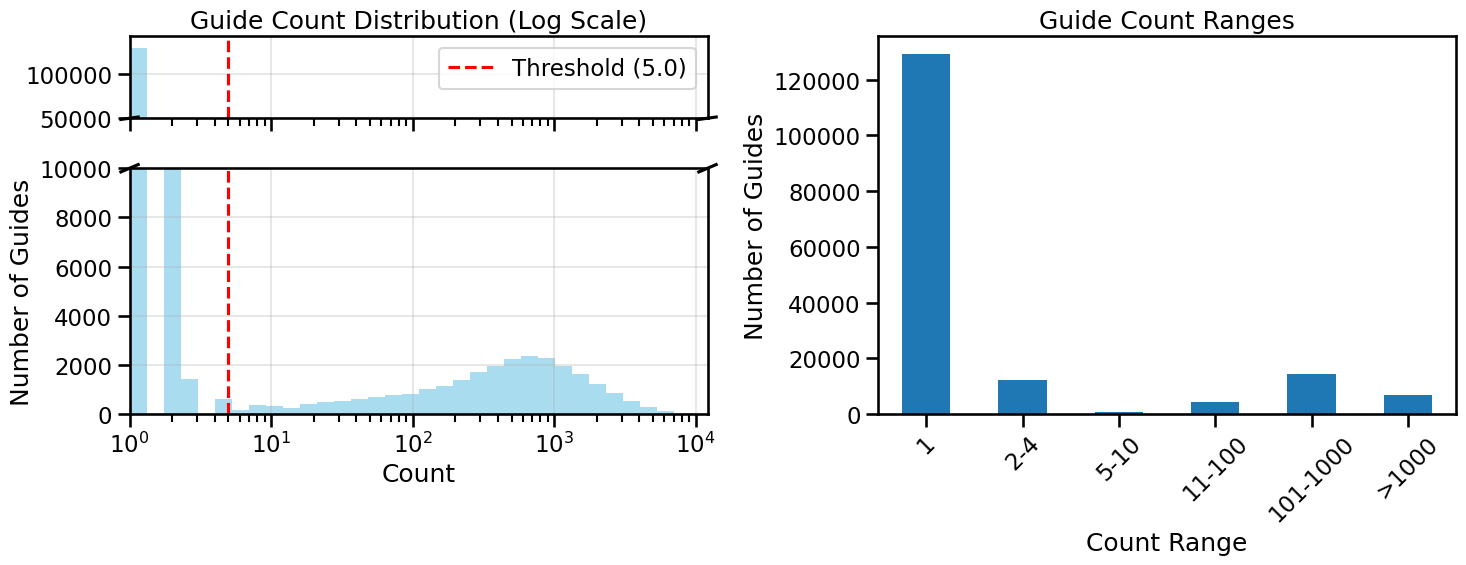

In [130]:
fig, axes = plot_guide_distribution(flat_df_rpe1e150, top_ymin = 50000, bottom_ymax = 10000)
plt.savefig('guide_counts_umi_cutoff_rpe1_e150.pdf')
plt.show()

3260030.0


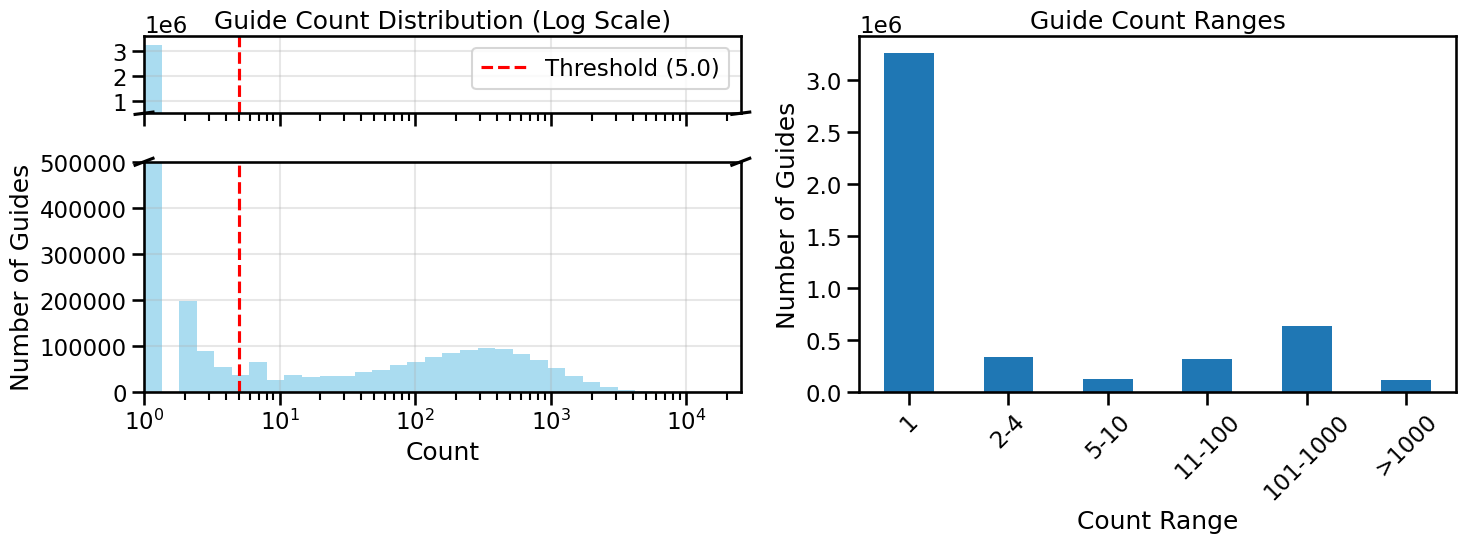

In [134]:
#this is actually rpe1 right now
fig, axes = plot_guide_distribution(flat_df_fibroa, top_ymin = 500000, bottom_ymax = 500000)
plt.savefig('guide_counts_umi_cutoff_fibroa.pdf')
plt.show()

22041581.0


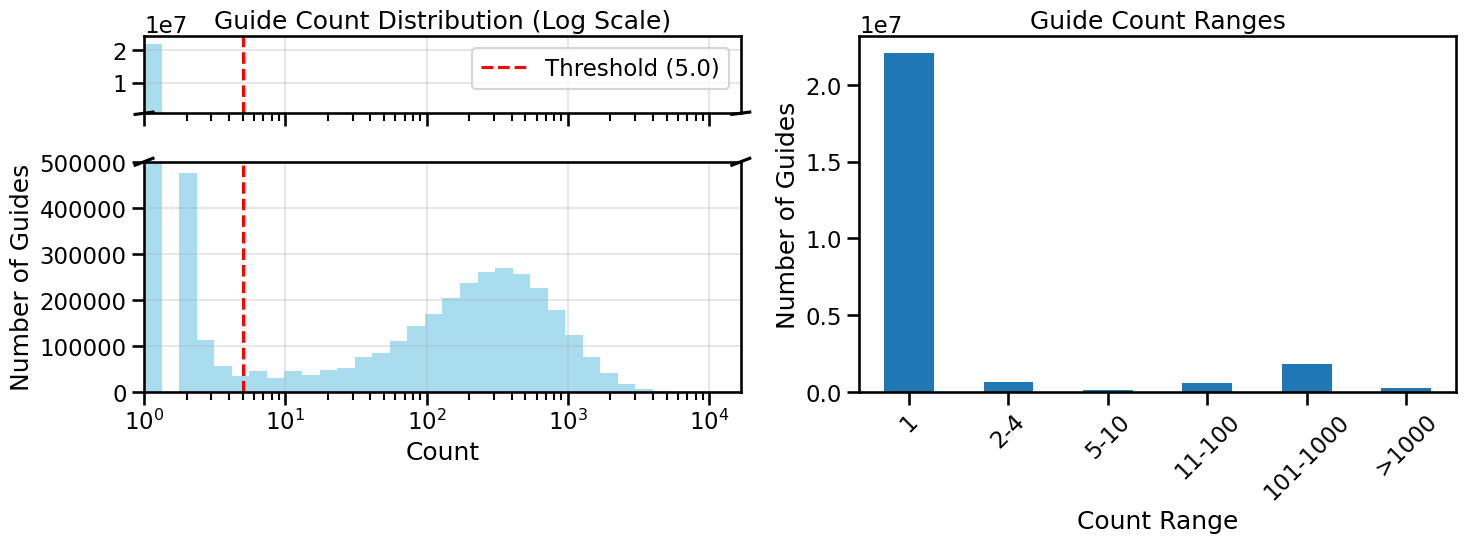

In [135]:
fig, axes = plot_guide_distribution(flat_df_rpe1a, top_ymin = 500000, bottom_ymax = 500000)
plt.savefig('guide_counts_umi_cutoff_rpe1a.pdf')
plt.show()